# This project aims to analyze historical HDB resale flat data from data.gov.sg to gain deeper insights. The data will be used to train a machine learning model for predictive purposes. 
# The project is undertaken by Mr. Koh Pee Sim.

# Load library

In [1]:
# Importing the initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

# Importing the sklearn modules to be used
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.linear_model import LinearRegression  # note need to import this
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import mean_squared_error

np.random.seed(88) # set a random seed

# Read the dataset and understand the content

In [2]:
# Load in the data

url = "ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv" # read input file
df = pd.read_csv(url)

## Find out any possible factor item of less than 10 distinct values.

In [3]:
# identify factor item in the file with less than 10 distinct values

columns_with_few_distinct_values = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    # Get the distinct values in the column
    distinct_values = df[column].unique()
    
    # Check if the number of distinct values is 10 or less
    if len(distinct_values) <= 10:
        # Store the column name and its distinct values in the dictionary
        columns_with_few_distinct_values[column] = distinct_values

# Print the results
print("Columns with 10 or fewer distinct values:")
for column, values in columns_with_few_distinct_values.items():
    print(f"{column}: {len(values)} distinct values -> {values}")
    

Columns with 10 or fewer distinct values:
flat_type: 7 distinct values -> ['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']


In [4]:
# Understand file details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192613 entries, 0 to 192612
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                192613 non-null  object 
 1   town                 192613 non-null  object 
 2   flat_type            192613 non-null  object 
 3   block                192613 non-null  object 
 4   street_name          192613 non-null  object 
 5   storey_range         192613 non-null  object 
 6   floor_area_sqm       192613 non-null  float64
 7   flat_model           192613 non-null  object 
 8   lease_commence_date  192613 non-null  int64  
 9   remaining_lease      192613 non-null  object 
 10  resale_price         192613 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.2+ MB


## Insight 1 : There are 192613 rows with 11 columns

In [5]:
df.describe() # provide statistics value for numberic column

,floor_area_sqm,lease_commence_date,resale_price
count,192613.000000,192613.000000,1.926130e+05
mean,97.042625,1996.146657,5.052341e+05
std,24.039213,14.120459,1.763197e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.750000e+05
50%,93.000000,1996.000000,4.750000e+05
75%,112.000000,2011.000000,6.030000e+05
max,366.700000,2022.000000,1.588000e+06


In [6]:
# look up for column contain null value
df.isnull().sum()


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

## Insight 2 : There is no null value in any column.

## Check for duplicate record.

In [7]:
duplicate_count = df.duplicated().sum()
print ('no of duplicate records is',duplicate_count)

no of duplicate records is 293


## There are 293 duplicate records 

In [8]:
# Remove duplicate rows
df = df.drop_duplicates()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192320 entries, 0 to 192612
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                192320 non-null  object 
 1   town                 192320 non-null  object 
 2   flat_type            192320 non-null  object 
 3   block                192320 non-null  object 
 4   street_name          192320 non-null  object 
 5   storey_range         192320 non-null  object 
 6   floor_area_sqm       192320 non-null  float64
 7   flat_model           192320 non-null  object 
 8   lease_commence_date  192320 non-null  int64  
 9   remaining_lease      192320 non-null  object 
 10  resale_price         192320 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 17.6+ MB


## Take a closer look at top 5 records and bottom 5 records

In [10]:
df.head(5)  # print first 5 records

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [11]:
df.tail(5)  # print last 5 records

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
192608,2024-10,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,145.0,Maisonette,1988,62 years 09 months,888888.0
192609,2024-10,YISHUN,EXECUTIVE,352,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,62 years 10 months,848000.0
192610,2024-10,YISHUN,EXECUTIVE,277,YISHUN ST 22,10 TO 12,152.0,Maisonette,1985,59 years 11 months,867000.0
192611,2024-10,YISHUN,EXECUTIVE,293,YISHUN ST 22,01 TO 03,169.0,Apartment,1992,66 years 09 months,860000.0
192612,2024-10,YISHUN,EXECUTIVE,824,YISHUN ST 81,10 TO 12,142.0,Apartment,1987,62 years 02 months,980000.0


## Find out the total count and distinct values for all the string fields except block and street name

Distinct values for month:
month
2024-07    3036
2021-08    2735
2021-07    2655
2024-01    2620
2024-08    2594
           ... 
2017-01    1176
2017-02    1080
2018-01    1072
2020-04     423
2020-05     363
Name: count, Length: 94, dtype: int64
Total distinct count: 94

Distinct values for town:
town
SENGKANG           15875
PUNGGOL            14277
WOODLANDS          13642
YISHUN             13128
TAMPINES           12882
JURONG WEST        12741
BEDOK              10148
HOUGANG             9689
CHOA CHU KANG       8789
ANG MO KIO          7925
BUKIT BATOK         7655
BUKIT MERAH         7364
BUKIT PANJANG       6992
TOA PAYOH           6002
KALLANG/WHAMPOA     5873
PASIR RIS           5640
SEMBAWANG           5323
QUEENSTOWN          5290
GEYLANG             4724
CLEMENTI            4302
JURONG EAST         3946
SERANGOON           3490
BISHAN              3440
CENTRAL AREA        1532
MARINE PARADE       1170
BUKIT TIMAH          481
Name: count, dtype: int64
Total distinct count

# Insight 3:
### By month, the highest transactions is 3039 in 2024-07 and the lowest transactions is 363 in 2020-05
### By town, the highest transactions happens at Sengkang, punggol, Woolands and Yishun. The lowest ones are in bukit Timah, Marine Parade and central Area.
### By flat_type, highest is 4 room and lowest is 1 room
### By storey range, hghest is 04-06 and lowest is 49-51
### by flat_model, highest is model A, lowest is Premium Maisonette
### A lot of flats sell on the five year.

## Try to understand the remaining_lease field

In [13]:
# Get all distinct values in the 'remaining_lease' column
distinct_values = df['remaining_lease'].unique()

# Display the distinct values
print("Distinct values in 'remaining_lease' column:")
print(distinct_values)


Distinct values in 'remaining_lease' column:
['61 years 04 months' '60 years 07 months' '62 years 05 months'
 '62 years 01 month' '63 years' '61 years 06 months' '58 years 04 months'
 '59 years 08 months' '59 years 06 months' '60 years' '62 years 08 months'
 '61 years' '60 years 10 months' '59 years 03 months' '61 years 05 months'
 '60 years 04 months' '62 years' '60 years 03 months' '63 years 09 months'
 '61 years 01 month' '61 years 10 months' '58 years 06 months'
 '59 years 04 months' '62 years 11 months' '60 years 08 months'
 '93 years 08 months' '93 years 07 months' '60 years 01 month'
 '94 years 08 months' '78 years 04 months' '60 years 06 months'
 '62 years 06 months' '58 years' '70 years 08 months' '63 years 04 months'
 '63 years 06 months' '67 years 07 months' '61 years 07 months'
 '68 years 02 months' '68 years 03 months' '56 years' '67 years 09 months'
 '67 years 05 months' '63 years 07 months' '66 years 03 months'
 '65 years 04 months' '69 years 05 months' '59 years 11 mont

# Insight 4 : 
## There are remaining_lease > 95 years. i.e. these are not sell in open market.

# Data Wrangling

## Convert month to date field and remaining_lease to number

In [14]:
# Convert 'month' field to a date
df['month_date'] = pd.to_datetime(df['month'], format='%Y-%m')

import re
# Function to convert 'remaining_lease' to total months
def lease_to_months(lease):
    # Use regex to capture the number of years and months
    years = re.search(r'(\d+)\s+years?', lease)
    months = re.search(r'(\d+)\s+months?', lease)
    
    # Convert to integers, if found, else default to 0 for months if missing
    years = int(years.group(1)) if years else 0
    months = int(months.group(1)) if months else 0

    remain_year = years + round((months/12),2)  # Convert to year
    return remain_year

# Apply the function to the 'remaining_lease' field
df['remaining_lease_year'] = df['remaining_lease'].apply(lease_to_months)

## Check the converted data

In [15]:
columns_to_display = ['remaining_lease','remaining_lease_year','month','month_date']

# Display the first 10 rows of these columns
df[columns_to_display].head(10)

,remaining_lease,remaining_lease_year,month,month_date
0,61 years 04 months,61.33,2017-01,2017-01-01
1,60 years 07 months,60.58,2017-01,2017-01-01
2,62 years 05 months,62.42,2017-01,2017-01-01
3,62 years 01 month,62.08,2017-01,2017-01-01
4,62 years 05 months,62.42,2017-01,2017-01-01
5,63 years,63.00,2017-01,2017-01-01
6,61 years 06 months,61.50,2017-01,2017-01-01
7,58 years 04 months,58.33,2017-01,2017-01-01
8,61 years 06 months,61.50,2017-01,2017-01-01
9,61 years 04 months,61.33,2017-01,2017-01-01


## Remove rows where 'remaining_lease' is greater than 95 as they are not in open resale market

In [16]:
df = df[df['remaining_lease_year'] <= 95]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187440 entries, 0 to 192612
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   month                 187440 non-null  object        
 1   town                  187440 non-null  object        
 2   flat_type             187440 non-null  object        
 3   block                 187440 non-null  object        
 4   street_name           187440 non-null  object        
 5   storey_range          187440 non-null  object        
 6   floor_area_sqm        187440 non-null  float64       
 7   flat_model            187440 non-null  object        
 8   lease_commence_date   187440 non-null  int64         
 9   remaining_lease       187440 non-null  object        
 10  resale_price          187440 non-null  float64       
 11  month_date            187440 non-null  datetime64[ns]
 12  remaining_lease_year  187440 non-null  float64       
dtypes: d

## Note after removing remaining_lease_year > 95 left only 187440 records

## Try to understand the relationship between flat_model and flat_type

In [18]:
# Group by 'flat_model' and get unique 'flat_type' values
distinct_flat_types = df.groupby('flat_model')['flat_type'].unique()

# Convert the result to a DataFrame for better readability
distinct_flat_types_df = distinct_flat_types.reset_index()

# Display the result
print("Distinct flat types for each flat model:")
print(distinct_flat_types_df)

Distinct flat types for each flat model:
                flat_model                                    flat_type
0                   2-room                                     [2 ROOM]
1                     3Gen                                     [5 ROOM]
2            Adjoined flat                  [5 ROOM, EXECUTIVE, 4 ROOM]
3                Apartment                                  [EXECUTIVE]
4                     DBSS             [4 ROOM, 5 ROOM, 3 ROOM, 2 ROOM]
5                 Improved     [2 ROOM, 5 ROOM, 3 ROOM, 4 ROOM, 1 ROOM]
6      Improved-Maisonette                                     [5 ROOM]
7               Maisonette                                  [EXECUTIVE]
8                  Model A             [3 ROOM, 4 ROOM, 5 ROOM, 2 ROOM]
9       Model A-Maisonette                                     [5 ROOM]
10                Model A2                                     [4 ROOM]
11        Multi Generation                           [MULTI-GENERATION]
12          New Generat

In [19]:
# Filter for rows where flat_model is 'terrace' and get distinct flat_type values
distinct_flat_types = df[df['flat_model'] == 'Terrace']['flat_type'].unique()

# Display the distinct values
print("Distinct flat types where flat model is 'Terrace':")
print(distinct_flat_types)


Distinct flat types where flat model is 'Terrace':
['3 ROOM' '4 ROOM']


# Insight 5: 
## Terrace model has flat type '3 ROOM' and '4 ROOM'. reclassify the flat type to 'TERRACE'

In [20]:
# Update 'flat_type' to 'Terrace' where 'flat_model' is 'terrace'
df.loc[df['flat_model'] == 'Terrace', 'flat_type'] = 'TERRACE'

## Convert storey range to numeric value as regression ML do not take string field.

In [21]:

def convert_storey_range(storey):
    # Extract the first two characters, convert to int, divide by 3, and add 1
    return (int(storey[:2]) // 3) + 1

# Apply the conversion function to the 'storey_range' column
df['storey_value'] = df['storey_range'].apply(convert_storey_range)

columns_to_display = ['storey_range','storey_value']

# Display the first 10 rows of these columns
df[columns_to_display].head(10)


,storey_range,storey_value
0,10 TO 12,4
1,01 TO 03,1
2,01 TO 03,1
3,04 TO 06,2
4,01 TO 03,1
5,01 TO 03,1
6,04 TO 06,2
7,04 TO 06,2
8,04 TO 06,2
9,01 TO 03,1


# Data Visualization

## Create a table contain average resale price for each flat_type by town and highlight the top 3 and bottom 3
### only show 1 room to 5 room the rest group under executive

In [22]:
# Average resale price by each flat_type for each town

# Step 1: Filter and map room types into desired categories

df['room_category'] = df['flat_type'].apply(lambda x: x if x in ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM'] 
                                            else 'EXECUTIVE')

# Step 2: Pivot to get the average prices for each room category by town
avg_price_table = df.pivot_table(values='resale_price', index='town', columns='room_category', aggfunc='mean')

# Step 3: Ensure all requested columns are present
for room_type in ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']:
    if room_type not in avg_price_table.columns:
        avg_price_table[room_type] = float('nan')

# Step 4: Order columns and round to integers
avg_price_table = avg_price_table[['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']].round(0).astype('Int64')

# Function to highlight top 3 and bottom 3 values
def highlight_top_bottom(s):
    # Get top 3 and bottom 3 values (exclude NaNs)
    is_top_3 = s.nlargest(3).index
    is_bottom_3 = s.nsmallest(3).index
    # Apply color based on value rank
    return ['background-color: lightgreen' if i in is_top_3 
            else 'background-color: salmon' if i in is_bottom_3 
            else '' for i in s.index]

# Apply style function to each column individually
styled_table = avg_price_table.style.apply(highlight_top_bottom, axis=0)

# Display the styled table
styled_table

room_category,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE
town,,,,,,
ANG MO KIO,,247767,338896,532012,730353,911062
BEDOK,,250032,330548,488854,631989,793623
BISHAN,,,394339,606296,821259,982637
BUKIT BATOK,,344807,323451,482893,646646,700872
BUKIT MERAH,204159,277795,416904,712643,824357,785667
BUKIT PANJANG,,270645,341044,443124,551554,671073
BUKIT TIMAH,,,430696,653529,892699,1056554
CENTRAL AREA,,279713,434594,810843,1027655,1034000
CHOA CHU KANG,,263997,344052,431910,508473,618103


## Insight 6:
### Only Bukit Merah got 1 Room resales transaction.
### There is no 2 Room resale transaction in Bishan and Bukit Timah.
### Marine Parade also do not have Executive resale transaction.
### Central Area is one of the highest resales price zones.
### Jurong West is one of the lowest resales price zones.


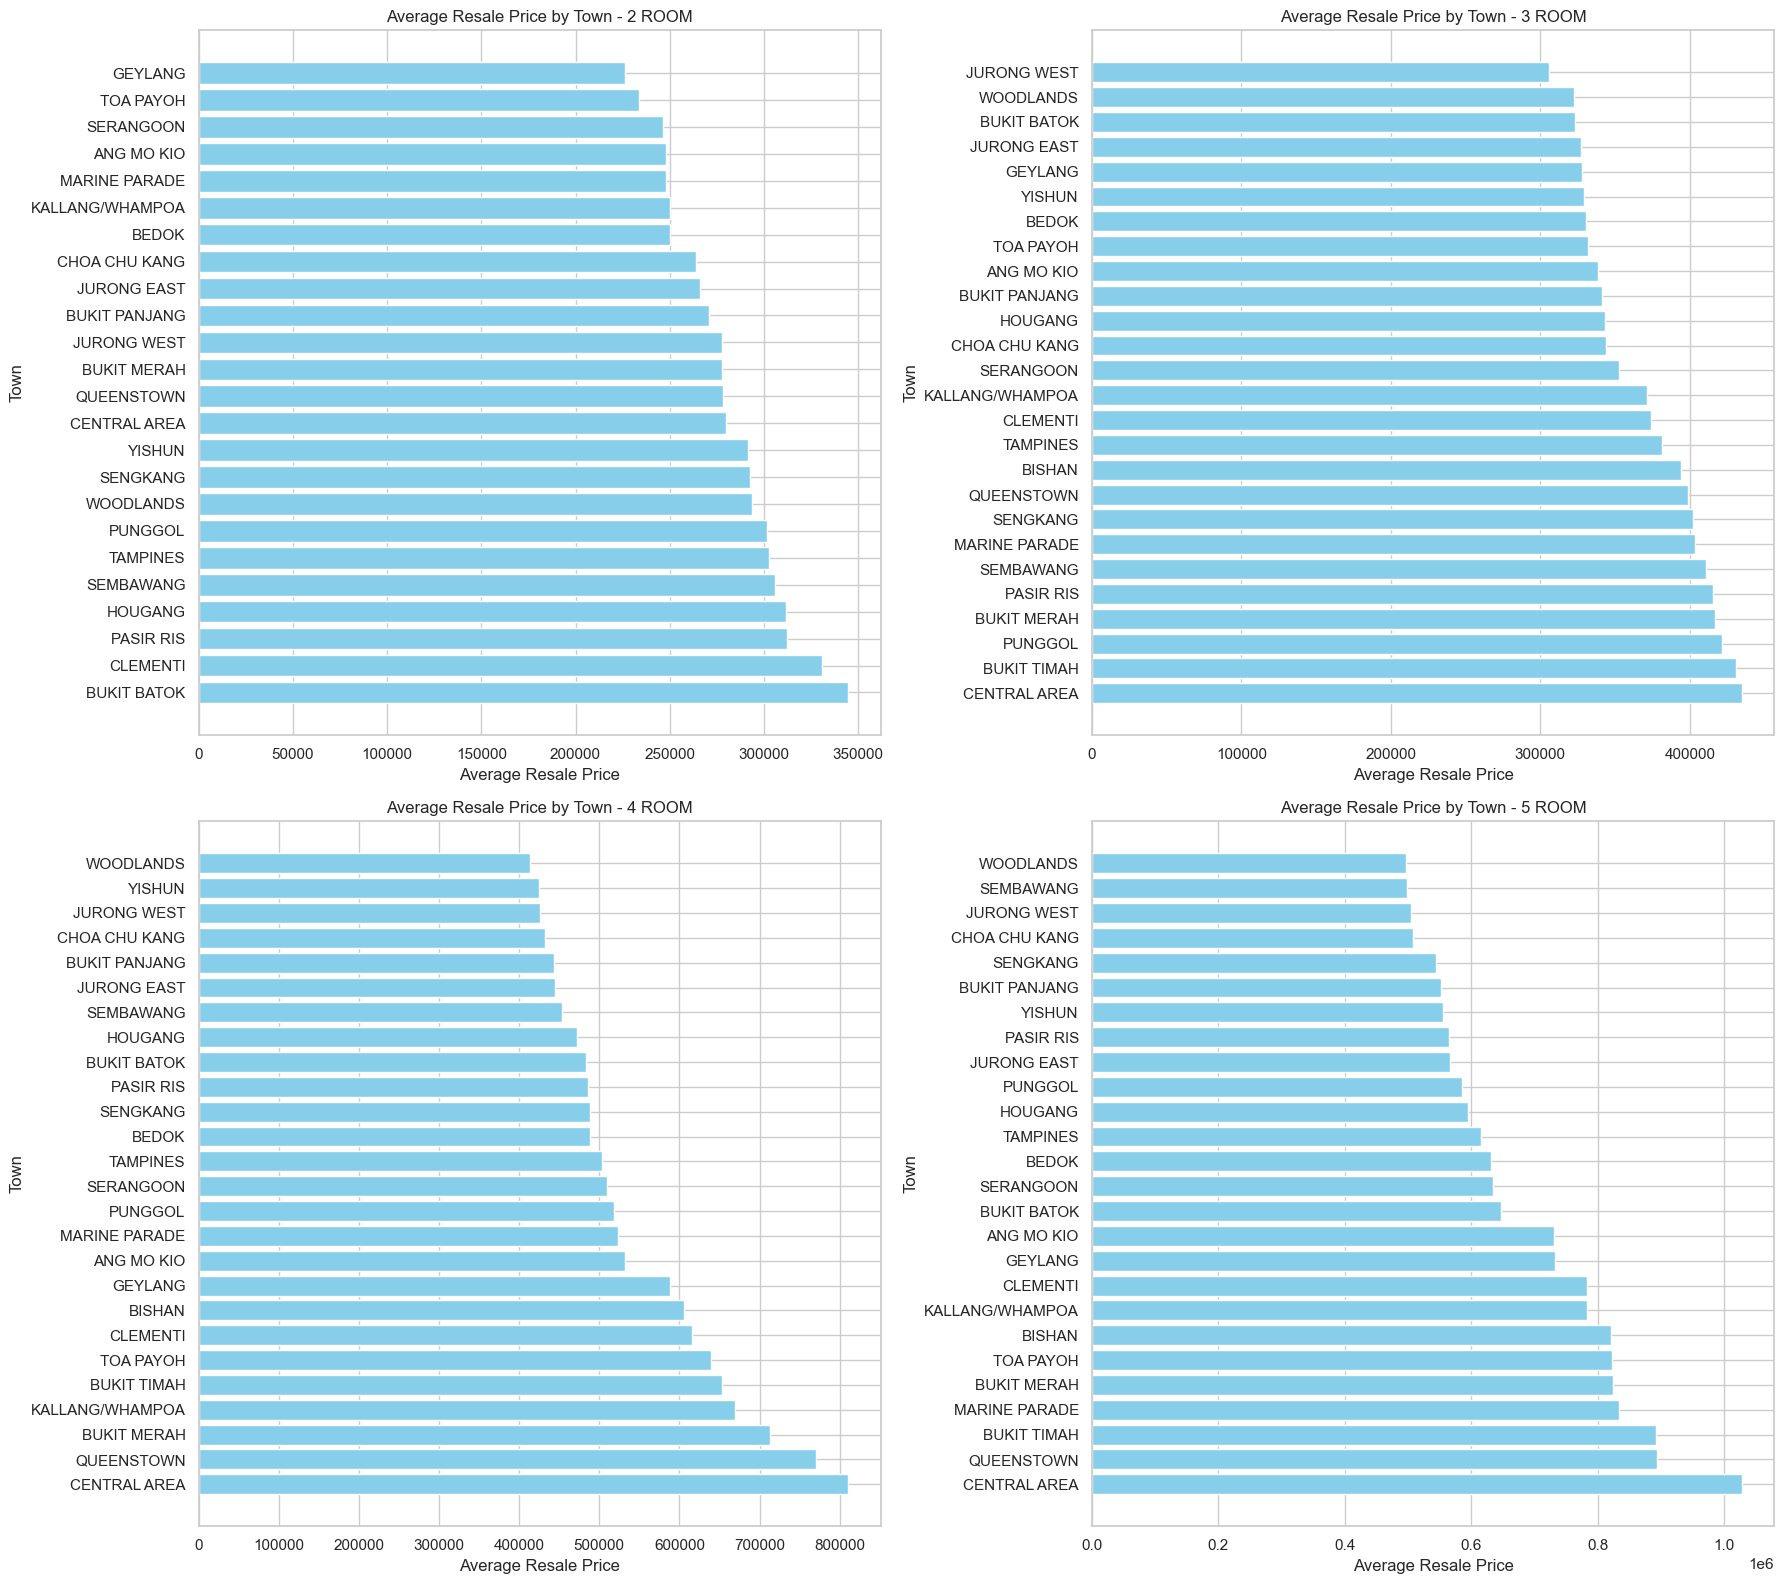

In [80]:
# View the above data in bar chart sorted by avg resale price
import matplotlib.pyplot as plt

# List of room types to plot (2 ROOM to 5 ROOM only)
room_types = ['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM']

# Set plot size for readability
fig, axs = plt.subplots(2, 2, figsize=(18, 16))  # Adjust grid size to 2x2 for four plots
axs = axs.ravel()  # Flatten the array of axes for easier indexing

# Loop through each room type and create a bar chart
for i, room in enumerate(room_types):
    # Filter and sort data for the current room type, excluding NaN values
    sorted_data = avg_price_table[room].dropna().sort_values(ascending=False)
    
    # Plot bar chart
    axs[i].barh(sorted_data.index, sorted_data.values, color='skyblue')
    axs[i].set_title(f'Average Resale Price by Town - {room}')
    axs[i].set_xlabel('Average Resale Price')
    axs[i].set_ylabel('Town')

# Adjust layout for readability
plt.tight_layout()
plt.show()



## Create a table contain highest resale price for each flat_type by town and highlight the top 3 and bottom 3
### only show 1 room to 5 room the rest group under executive

In [23]:
# Highest resale price by each flat_type for each town

# Step 1: Filter and map room types into desired categories (unchanged)
df['room_category'] = df['flat_type'].apply(lambda x: x if x in ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM'] else 'EXECUTIVE')

# Step 2: Pivot to get the maximum prices for each room category by town
max_price_table = df.pivot_table(values='resale_price', index='town', columns='room_category', aggfunc='max')

# Step 3: Ensure all requested columns are present (unchanged)
for room_type in ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']:
    if room_type not in max_price_table.columns:
        max_price_table[room_type] = float('nan')

# Step 4: Order columns and convert to integers (unchanged)
max_price_table = max_price_table[['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']].round(0).astype('Int64')

# (Optional) Function to highlight top values (modify for your needs)
def highlight_top_bottom(s):
    # Get top 3 and bottom 3 values (exclude NaNs)
    is_top_3 = s.nlargest(3).index
    is_bottom_3 = s.nsmallest(3).index
    # Apply color based on value rank
    return ['background-color: lightgreen' if i in is_top_3 else 'background-color: salmon' if i in is_bottom_3 else '' for i in s.index]
# Apply style function to each column individually (modify for your needs)
styled_table = max_price_table.style.apply(highlight_top_bottom, axis=0)

# Display the styled table
styled_table


room_category,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE
town,,,,,,
ANG MO KIO,,331888,780000,1080000,1300000,1320000
BEDOK,,370000,663000,930000,1068000,1180888
BISHAN,,,560000,1090000,1568000,1500000
BUKIT BATOK,,418000,600000,868000,1000000,1088000
BUKIT MERAH,280000,585000,860000,1500000,1588000,887000
BUKIT PANJANG,,386000,518000,780000,900000,1098888
BUKIT TIMAH,,,570000,900000,1238000,1410000
CENTRAL AREA,,430000,625000,1450000,1540000,1118000
CHOA CHU KANG,,325000,486000,670000,768000,915000


## Insight 7:
### Bukit Merah is one of the highest max resales price in all room type except executive.
### Chua Chu Kang is one of the lowest max resales price in 3 - 5 room type
### Sembawang is one of the lowest max resales price in 5 & executive room type
### Serangoon is one of the lowest max resales price in 2 - 3 room type

## Create a table contain lowest resale price for each flat_type by town and highlight the top 3 and bottom 3
### only show 1 room to 5 room the rest group under executive

In [24]:
# lowest resale price by each flat_type for each town

# Step 1: Filter and map room types into desired categories (unchanged)
df['room_category'] = df['flat_type'].apply(lambda x: x if x in ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM'] else 'EXECUTIVE')

# Step 2: Pivot to get the maximum prices for each room category by town
max_price_table = df.pivot_table(values='resale_price', index='town', columns='room_category', aggfunc='min')

# Step 3: Ensure all requested columns are present (unchanged)
for room_type in ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']:
    if room_type not in max_price_table.columns:
        max_price_table[room_type] = float('nan')

# Step 4: Order columns and convert to integers (unchanged)
max_price_table = max_price_table[['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']].round(0).astype('Int64')

# (Optional) Function to highlight top values (modify for your needs)
def highlight_top_bottom(s):
    # Get top 3 and bottom 3 values (exclude NaNs)
    is_top_3 = s.nlargest(3).index
    is_bottom_3 = s.nsmallest(3).index
    # Apply color based on value rank
    return ['background-color: lightgreen' if i in is_top_3 else 'background-color: salmon' if i in is_bottom_3 else '' for i in s.index]
# Apply style function to each column individually (modify for your needs)
styled_table = max_price_table.style.apply(highlight_top_bottom, axis=0)

# Display the styled table
styled_table

room_category,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE
town,,,,,,
ANG MO KIO,,178000,174000,275000,420000,623000
BEDOK,,180000,200000,300000,380000,520000
BISHAN,,,210000,328000,473000,660000
BUKIT BATOK,,290000,208000,270888,360000,490000
BUKIT MERAH,157000,170000,200000,320000,480000,720000
BUKIT PANJANG,,200000,238000,235000,340000,400000
BUKIT TIMAH,,,300000,448000,710000,765000
CENTRAL AREA,,200000,292000,385000,555000,950000
CHOA CHU KANG,,200000,225000,265000,307000,390000


## Insight 8:
### Bukit Timah is one of the highest min resales price in 3 room and above.
### Central Area is one of the highest min resales price in in 3 & 4 room type and executive.
### Marine Parade is one of the highest min resales price in in 4 & 5 room type.
### Toa Payoh is one of the lowest min resales price in 2 & 3 room type
### Woodlans is one of the lowest min resales price in 2, 4 & 5 room type

## line plot (trend) for the total transactions count and total resale value by flat_type

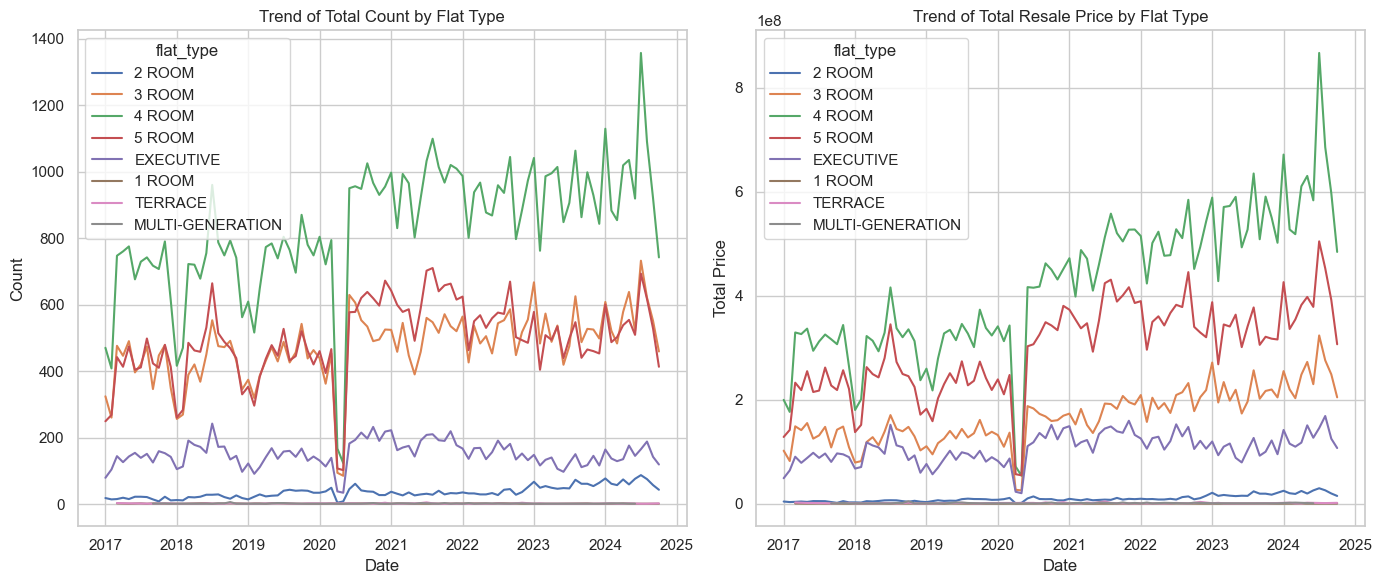

In [25]:
# Line chart
# Set plot style
sns.set(style="whitegrid")

# Group by date and flat_type to calculate the total count and total price
grouped_count = df.groupby(['month_date', 'flat_type']).size().reset_index(name='count')
grouped_price = df.groupby(['month_date', 'flat_type'])['resale_price'].sum().reset_index()

# Create a figure and axes for side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Total count by flat_type over time
sns.lineplot(data=grouped_count, x='month_date', y='count', hue='flat_type', ax=axs[0])
axs[0].set_title('Trend of Total Count by Flat Type')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Count')

# Plot 2: Total price by flat_type over time
sns.lineplot(data=grouped_price, x='month_date', y='resale_price', hue='flat_type', ax=axs[1])
axs[1].set_title('Trend of Total Resale Price by Flat Type')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Total Price')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Insight 9: 
### Over the years, 4 room has the highest resales volume and value. Follow by 5 room.
### In Mar-Apr 2020, there is a sharp drop in resales transaction across all flat type.

## Recommendation 1:
### Government could plan to build more 4 room and 5 room new flat to balance the demand.


## Trend plot for average resale price by flat_type

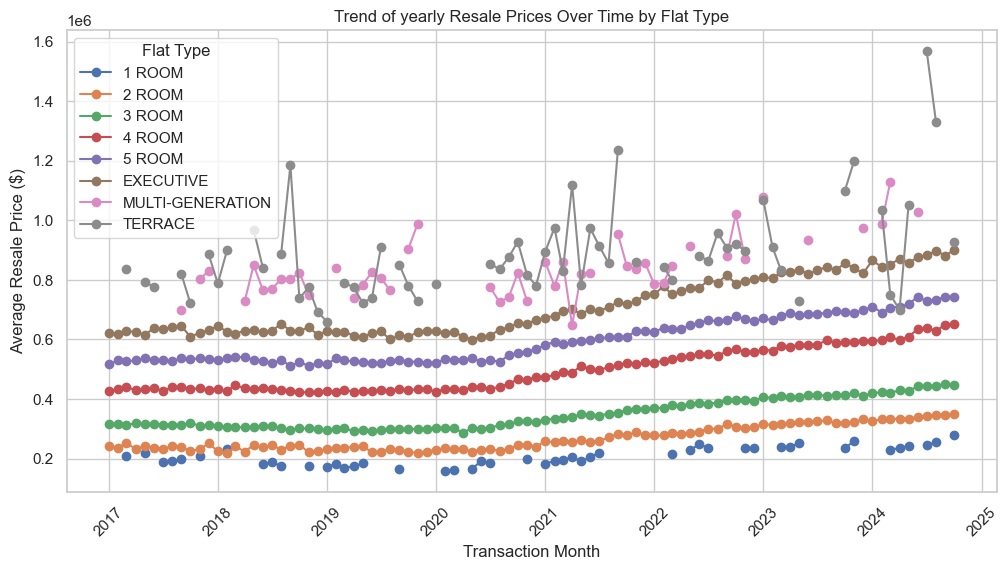

In [26]:
# Group by month_date and flat_type and calculate the average resale price
monthly_avg_price_by_type = df.groupby(['month_date', 'flat_type'])['resale_price'].mean().unstack()

# Plot the trend for each flat type
plt.figure(figsize=(12, 6))
for flat_type in monthly_avg_price_by_type.columns:
    plt.plot(monthly_avg_price_by_type.index, monthly_avg_price_by_type[flat_type], marker='o', linestyle='-', label=flat_type)

# Add labels, title, and legend
plt.xlabel('Transaction Month')
plt.ylabel('Average Resale Price ($)')
plt.title('Trend of yearly Resale Prices Over Time by Flat Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Flat Type')

# Show plot
plt.show()

## Insight 10: 
### There is some months got no transaction for 1 room, multi_generation and terrace flat.
### Generally the resales price for multi_generation and terrace flat is higher. The price vary at times.
### The price for 1 to 5 room are almost flat before mid 2020 and have a upward trend after that.
### The price gap between 3 to 4 room and 5 to Executive room are widening. while 4 to 5 room is narrowing.

## Bar chart for total transaction count and total resales value by flat_type, town, flat_model and storey_range.

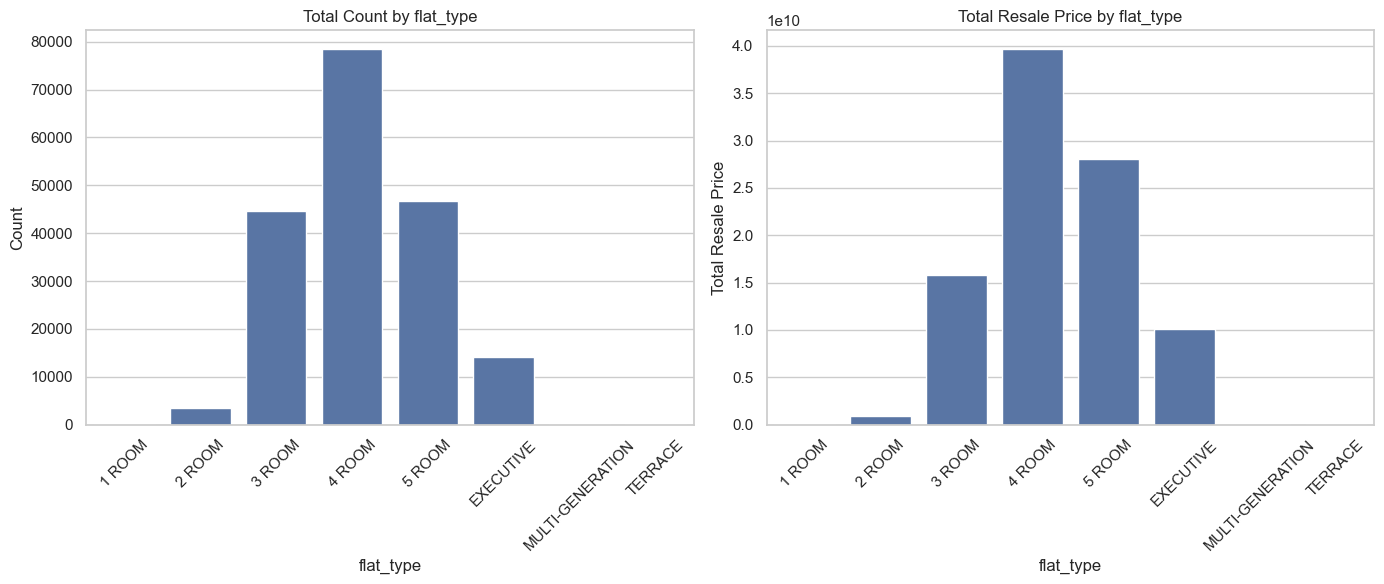

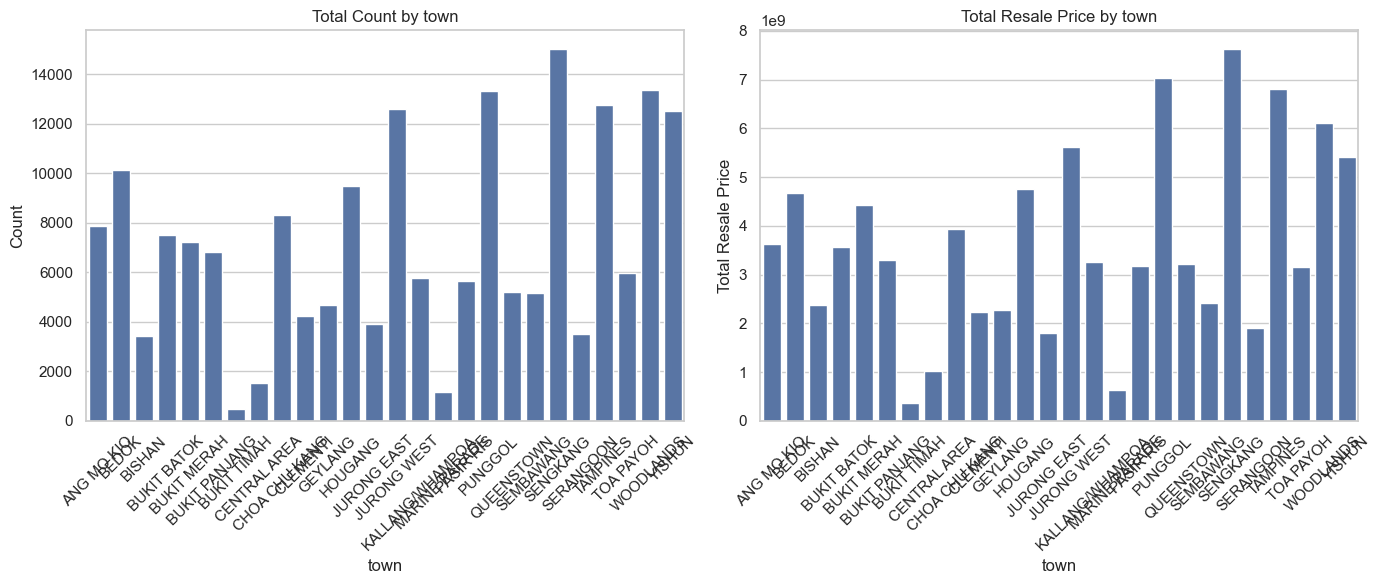

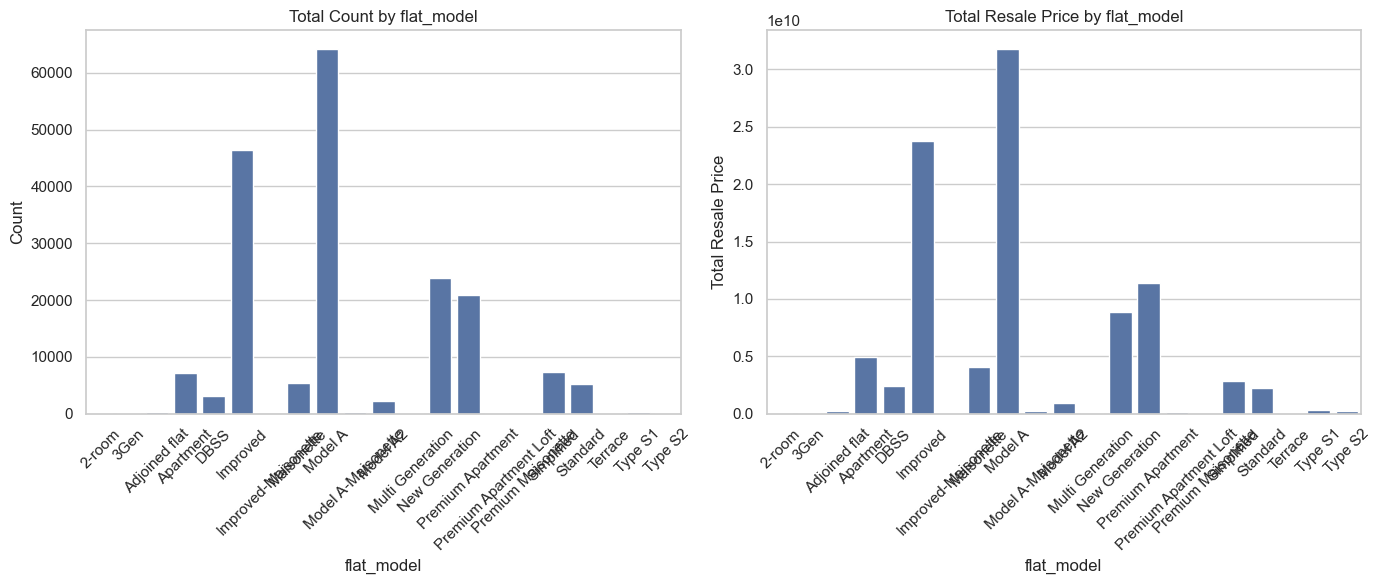

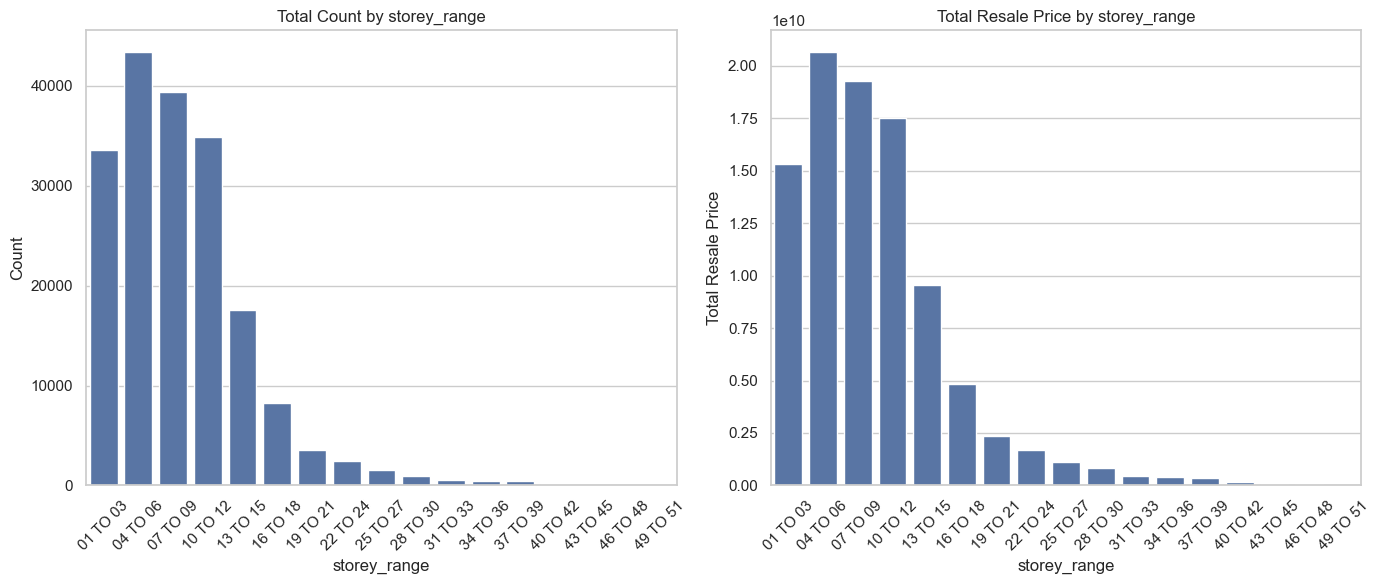

In [27]:
# Bar Chart
# Set plot style
sns.set(style="whitegrid")

# Columns to loop over
columns_to_plot = ['flat_type', 'town', 'flat_model', 'storey_range']

# Function to plot total count and total price for a given column
def plot_count_and_price(column_name):
    # Group by the specified column to calculate total count and total price
    grouped_count = df.groupby([column_name]).size().reset_index(name='count')
    grouped_price = df.groupby([column_name])['resale_price'].sum().reset_index(name='total_price')
    
    # Create a figure and axes for side-by-side plots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Total count by the specified column
    sns.barplot(data=grouped_count, x=column_name, y='count', ax=axs[0])
    axs[0].set_title(f'Total Count by {column_name}')
    axs[0].set_xlabel(column_name)
    axs[0].set_ylabel('Count')
    axs[0].tick_params(axis='x', rotation=45)  # Rotate x labels by 45 degrees
    
    # Plot 2: Total price by the specified column
    sns.barplot(data=grouped_price, x=column_name, y='total_price', ax=axs[1])
    axs[1].set_title(f'Total Resale Price by {column_name}')
    axs[1].set_xlabel(column_name)
    axs[1].set_ylabel('Total Resale Price')
    axs[1].tick_params(axis='x', rotation=45)  # Rotate x labels by 45 degrees
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Loop over the columns to plot
for column in columns_to_plot:
    plot_count_and_price(column)
    
# stop here

## Insight 11:
### 4 room has the highest resales transaction volume and value. follow by 5 room and 3 room.
### Sengkang has the highest resales transaction volume and value.
### Model A has the highest resales transaction volume and value. 
### Floor level 4-6 has the highest total resales transaction volume and value.
### 90% of the resale transactions is less than 16 floor.


## Boxplot of resale price for each flat_type, flat_model, storey_range and town

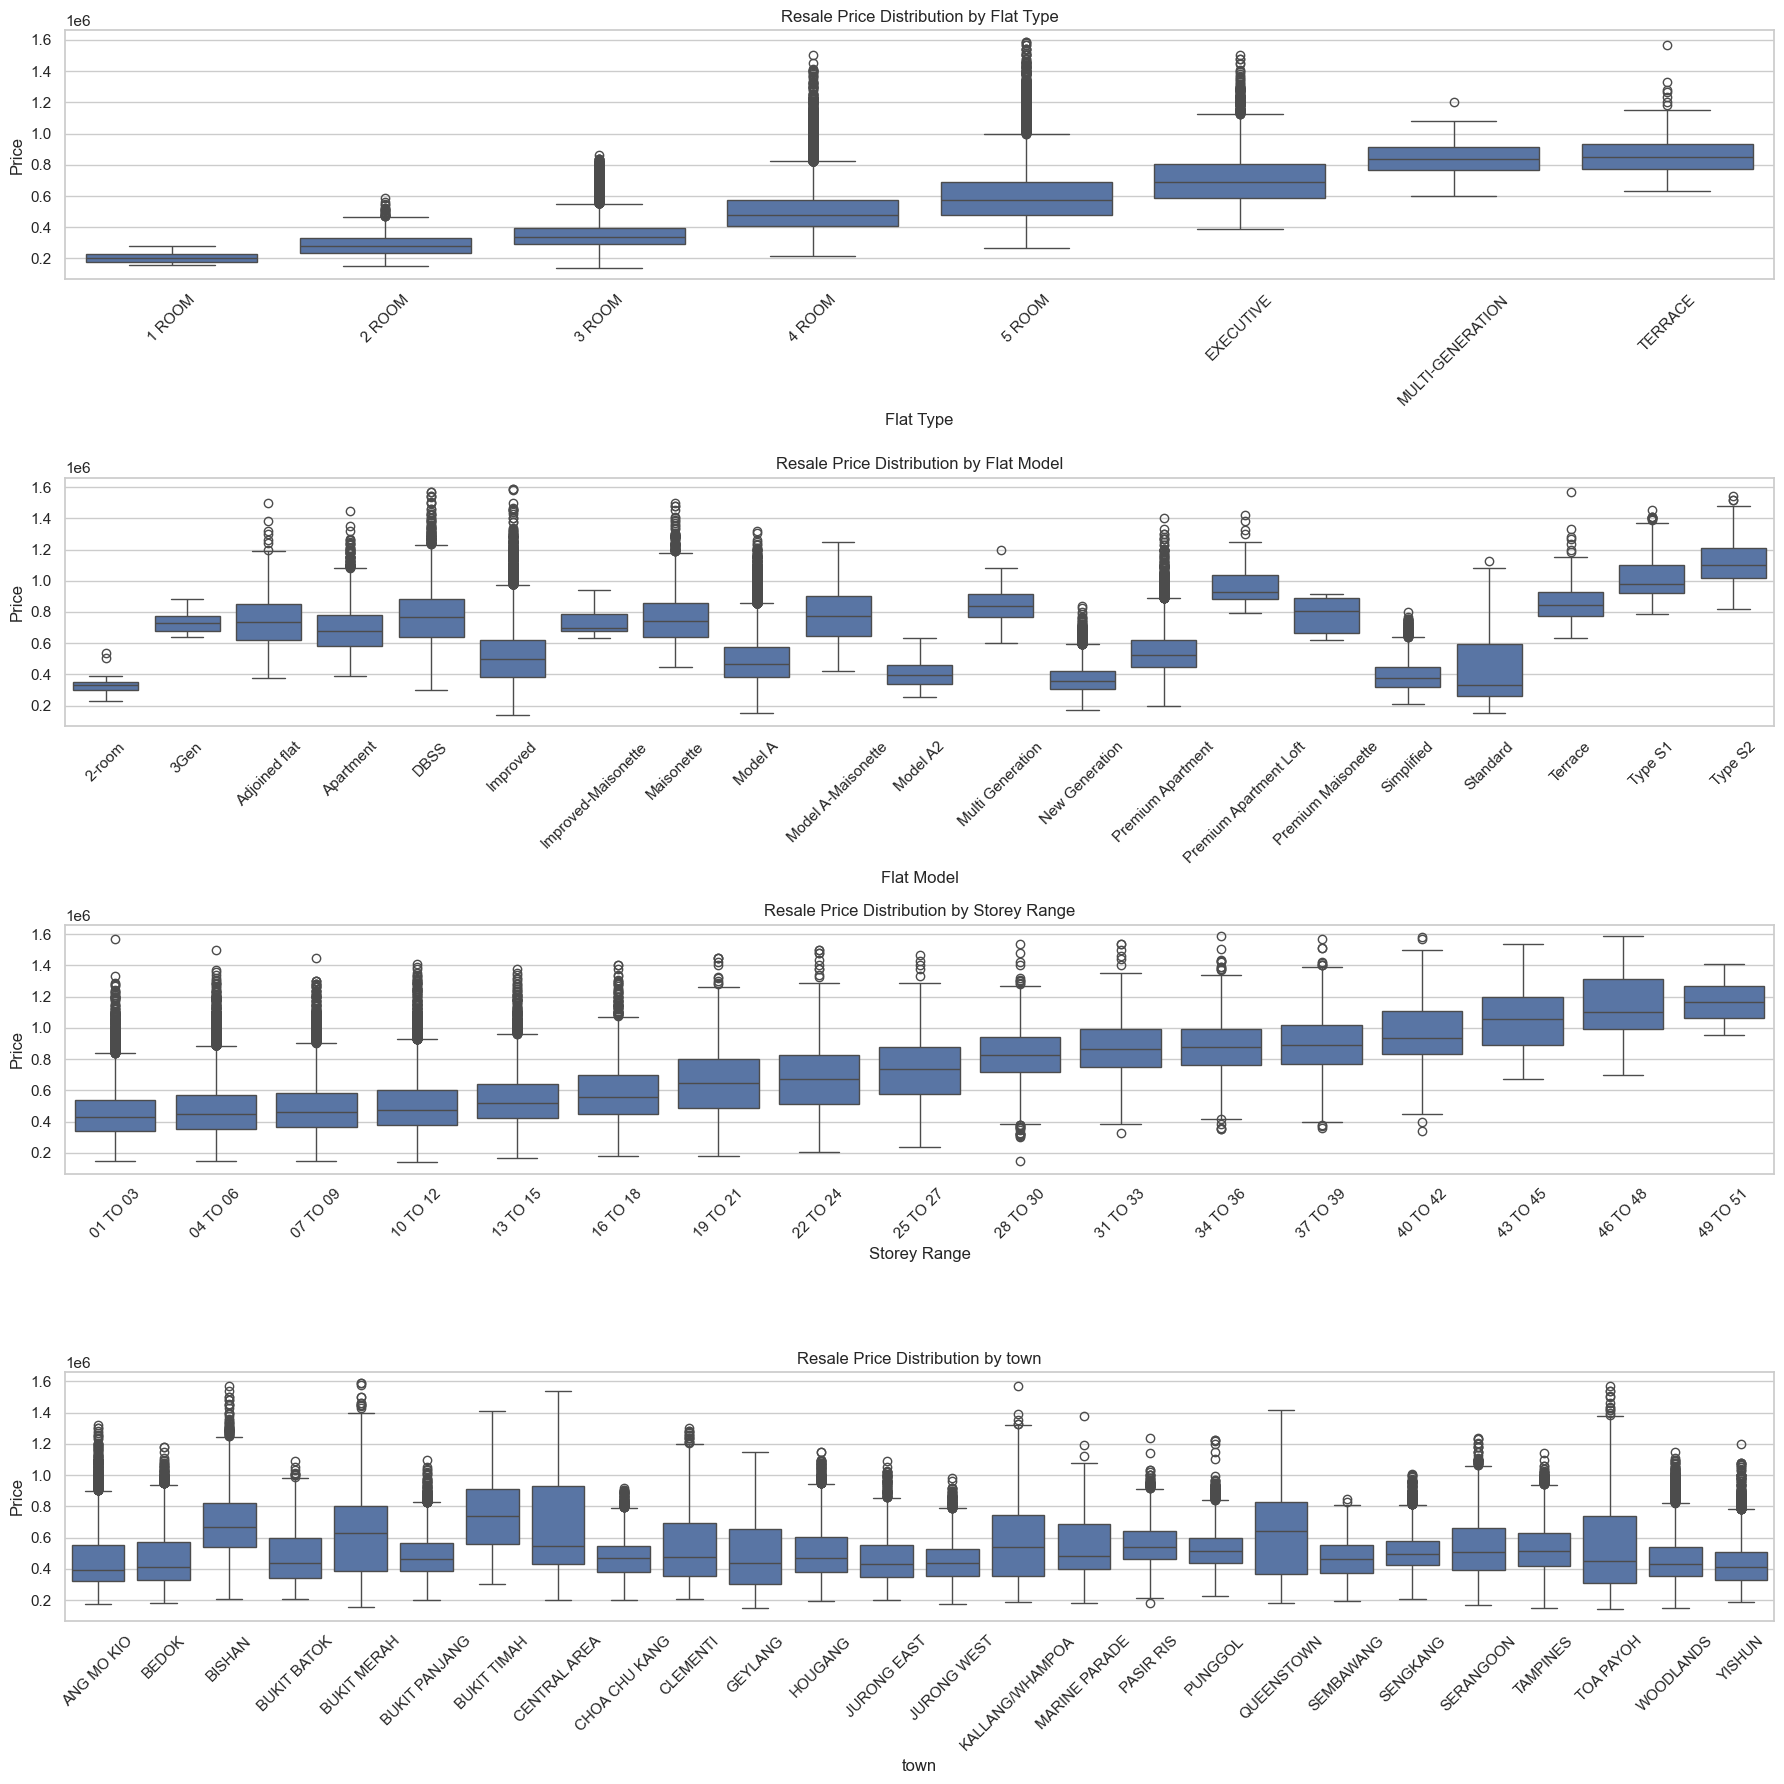

In [30]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Sort unique values for each category
flat_type_order = sorted(df['flat_type'].unique())
flat_model_order = sorted(df['flat_model'].unique())
storey_range_order = sorted(df['storey_range'].unique())
town_order = sorted(df['town'].unique())

# Create subplots for boxplots
fig, axs = plt.subplots(4, 1, figsize=(18, 18))

# Boxplot for price by flat_type (sorted by flat_type order)
sns.boxplot(data=df, x='flat_type', y='resale_price', ax=axs[0], order=flat_type_order)
axs[0].set_title('Resale Price Distribution by Flat Type')
axs[0].set_xlabel('Flat Type')
axs[0].set_ylabel('Price')

# Boxplot for price by flat_model (sorted by flat_model order)
sns.boxplot(data=df, x='flat_model', y='resale_price', ax=axs[1], order=flat_model_order)
axs[1].set_title('Resale Price Distribution by Flat Model')
axs[1].set_xlabel('Flat Model')
axs[1].set_ylabel('Price')

# Boxplot for price by storey_range (sorted by storey_range order)
sns.boxplot(data=df, x='storey_range', y='resale_price', ax=axs[2], order=storey_range_order)
axs[2].set_title('Resale Price Distribution by Storey Range')
axs[2].set_xlabel('Storey Range')
axs[2].set_ylabel('Price')

# Boxplot for price by town (sorted by town order)
sns.boxplot(data=df, x='town', y='resale_price', ax=axs[3], order=town_order)
axs[3].set_title('Resale Price Distribution by town')
axs[3].set_xlabel('town')
axs[3].set_ylabel('Price')

# Rotate x labels for better readability
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


## Insight 12:

### By Flat Type
#### 2 room - executive has a lot of high outlier resales transactions.
#### Terrace resales price is much higher than 3 or 4 room flat so it is right to reclassify them.

### By Flat Model
#### Quite a lot of high outlier resales transactions but no low outlier.

### By Floor Level
#### Higher floor tends to have better resales value on average.
#### There is a lot high outlier resale transactions below 19th floor.
#### Between 28-42th floor has low outliers and high outliers.

### By Town
#### All town has high outlier except Bukit Timah, Central Area and Queentown
#### All town has no low outlier except Paris Ris

## Pie chart for top 5 total transaction count and top 5 total resale value by flat_type, flat_model, storey_range and town.

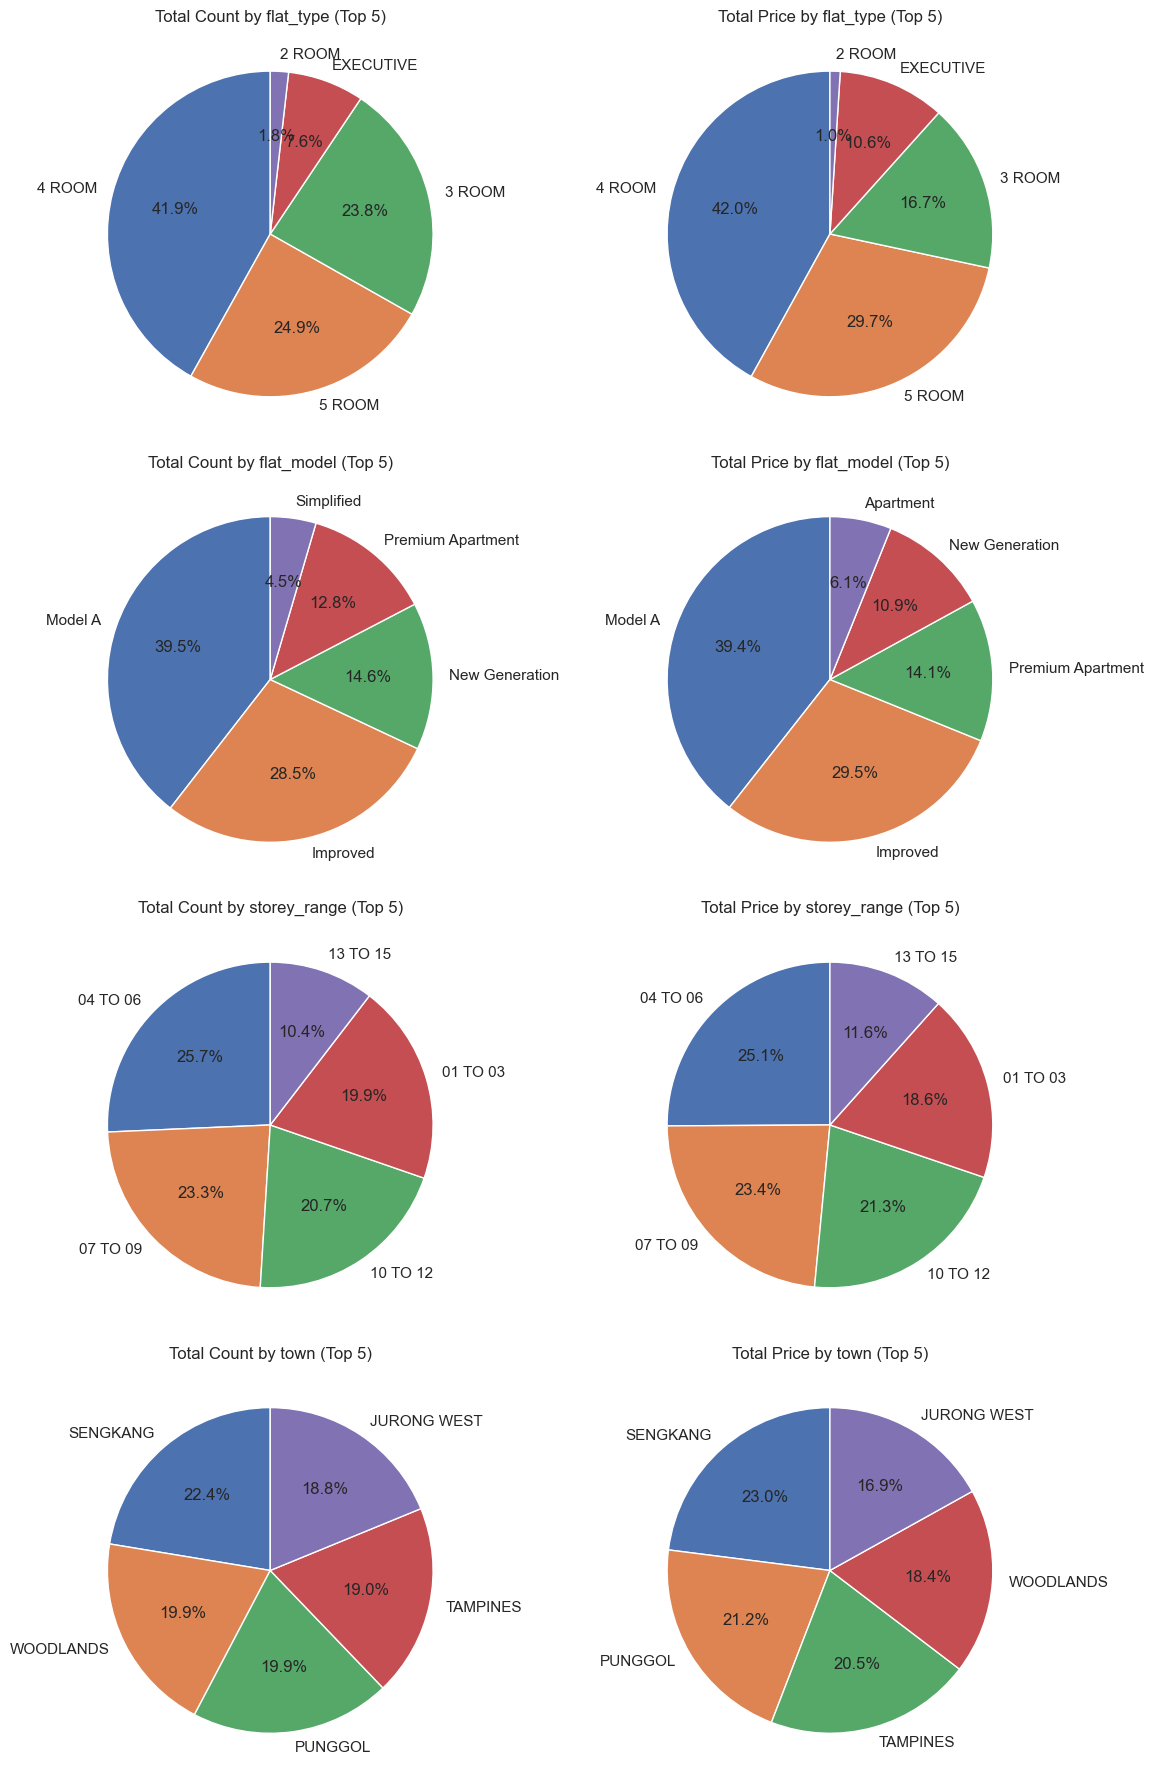

In [85]:
import matplotlib.pyplot as plt

# Function to plot pie charts for a given column (category)
def plot_pie_charts(df, category, ax1, ax2):
    # Top 5 count by category
    count_data = df[category].value_counts().nlargest(5)

    # Top 5 total price by category
    price_data = df.groupby(category)['resale_price'].sum().nlargest(5)

    # Plot pie chart for total count
    ax1.pie(count_data, labels=count_data.index, autopct='%1.1f%%', startangle=90)
    ax1.set_title(f'Total Count by {category} (Top 5)')

    # Plot pie chart for total price
    ax2.pie(price_data, labels=price_data.index, autopct='%1.1f%%', startangle=90)
    ax2.set_title(f'Total Price by {category} (Top 5)')

# Set up the figure for subplots (side by side plots)
fig, axs = plt.subplots(4, 2, figsize=(12, 18))

# Plot pie charts for flat_type
plot_pie_charts(df, 'flat_type', axs[0, 0], axs[0, 1])

# Plot pie charts for flat_model
plot_pie_charts(df, 'flat_model', axs[1, 0], axs[1, 1])

# Plot pie charts for storey_range
plot_pie_charts(df, 'storey_range', axs[2, 0], axs[2, 1])

# Plot pie charts for town
plot_pie_charts(df, 'town', axs[3, 0], axs[3, 1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


## Insight 13:

### By Flat Type
### 4 room is the highest resales transaction volume and value. follow by 5 room and 3 room.

### By Flat Model
### Model A is the highest resales transaction volume and value. follow by Improved.

### By floor Level
### floor level 04 - 06 is the highest resales transaction volume and value. follow by 07 - 09 and 10 - 12

### By town 
### SengKang is the highest resales transaction volume and value. 

## Recommendation 2:
### Seller of 4 room model A flat can ask for higher price. Buyer of these flat expect to pay higher.
### Property agent should work on 4 room model A flat so have higher chance to close a deal.


## Scatter plot for resale price vs remaining lease and floor area(sqm)

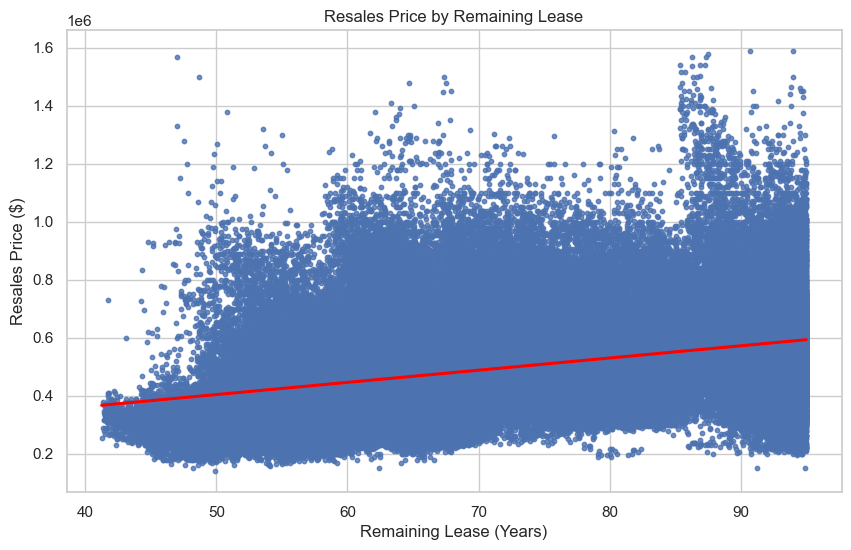

In [32]:
# scratter plot resales price vs remaining lease

# Set up the plot
plt.figure(figsize=(10, 6))

# Scatter plot with a trend line
sns.regplot(data=df, x='remaining_lease_year', y='resale_price', scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Remaining Lease (Years)')
plt.ylabel('Resales Price ($)')
plt.title('Resales Price by Remaining Lease')

# Show plot
plt.show()


## Insight 14:

### From the graph, the smooth line showing upward line. i.e. the longer lease remain the better resale price.
### If the remaining lease is less than 50 years. most transactions is sell below the average line.

## Recommendation 3:
### Seller should try to sell their flat before the 50 years of remaining lease.
### Property agent could use this information to convince flat onwer to sell their flat if remaining lease is close to 50 years.

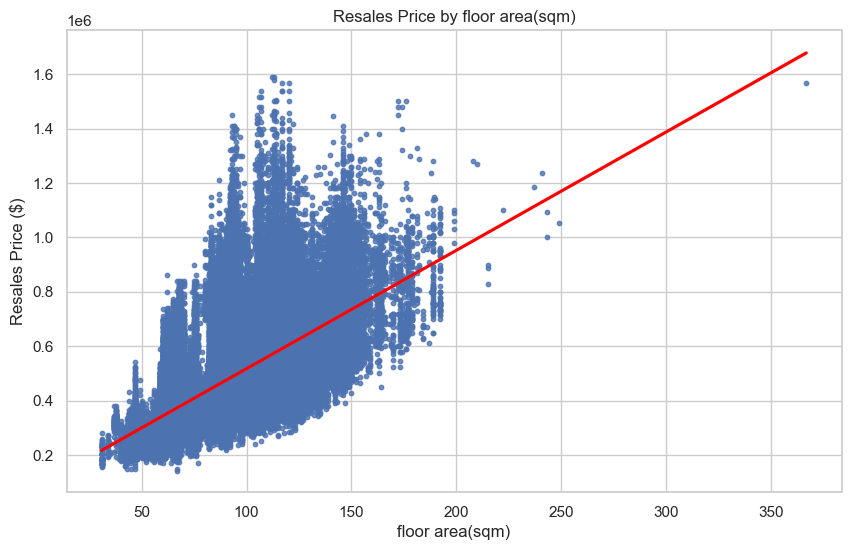

In [33]:
# scratter plot resales price vs floor area(sqm)

# Set up the plot
plt.figure(figsize=(10, 6))

# Scatter plot with a trend line
sns.regplot(data=df, x='floor_area_sqm', y='resale_price', scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('floor area(sqm)')
plt.ylabel('Resales Price ($)')
plt.title('Resales Price by floor area(sqm)')

# Show plot
plt.show()

## Insight 15:

### From the graph, it shows even more positive correlation i.e. bigger area will catch higher price.
### most transaction for floor area between 80 to 170 sqm is sell higher than average line.

## recommendation 4:
### the flat seller of floor area between 80 to 170 sqm can ask for better resales price.
### Property Selling agent could take note of this infomation to help seller get a better price.

## violinplot of resale price by town. This show the distribution of resale price for each town.

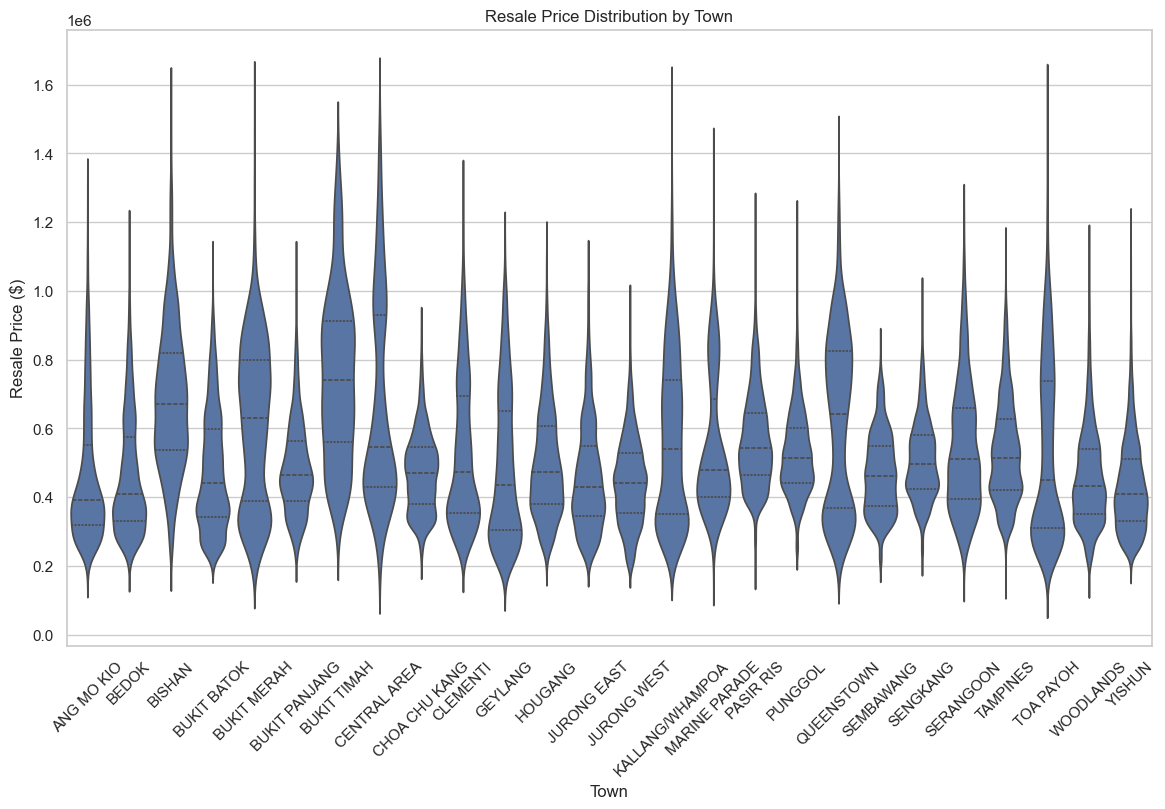

In [34]:
plt.figure(figsize=(14, 8))

# Violin plot of resale price distribution by town
sns.violinplot(data=df, x='town', y='resale_price', scale='width', inner='quartile')

# Add labels and title
plt.xlabel('Town')
plt.ylabel('Resale Price ($)')
plt.title('Resale Price Distribution by Town')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.show()

## A line plot each show the average resale price by lease_commence_date

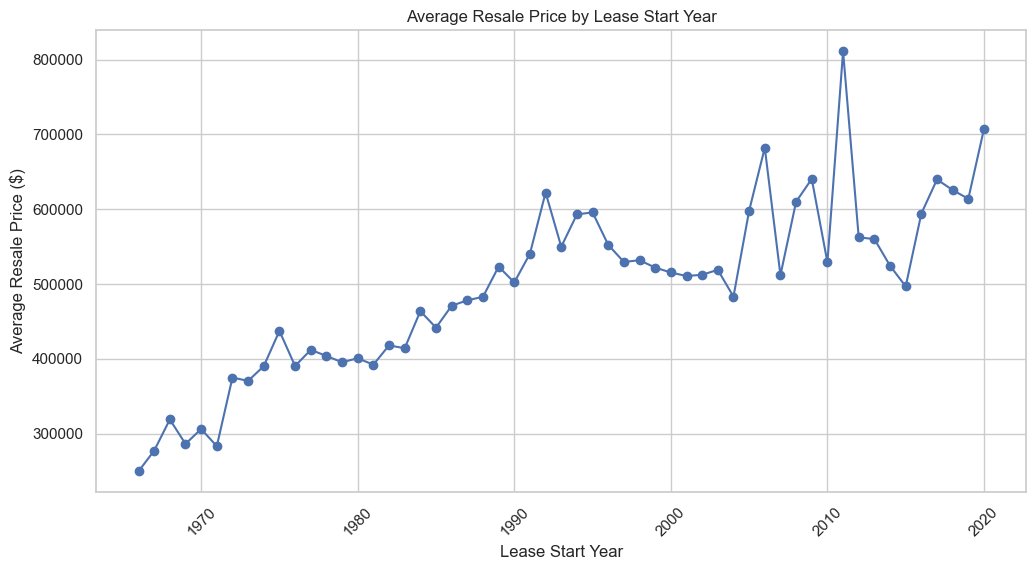

In [35]:
# To visualize the Average Resale Price by Lease Start Year
# lease year start. try later
#df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date']).dt.year

# Group by lease start year and calculate the average resale price
avg_price_by_lease_year = df.groupby('lease_commence_date')['resale_price'].mean()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_lease_year.index, avg_price_by_lease_year.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Lease Start Year')
plt.ylabel('Average Resale Price ($)')
plt.title('Average Resale Price by Lease Start Year')
plt.xticks(rotation=45)

# Show plot
plt.show()

## Bar plot which show the proportion of Flat Types by Town

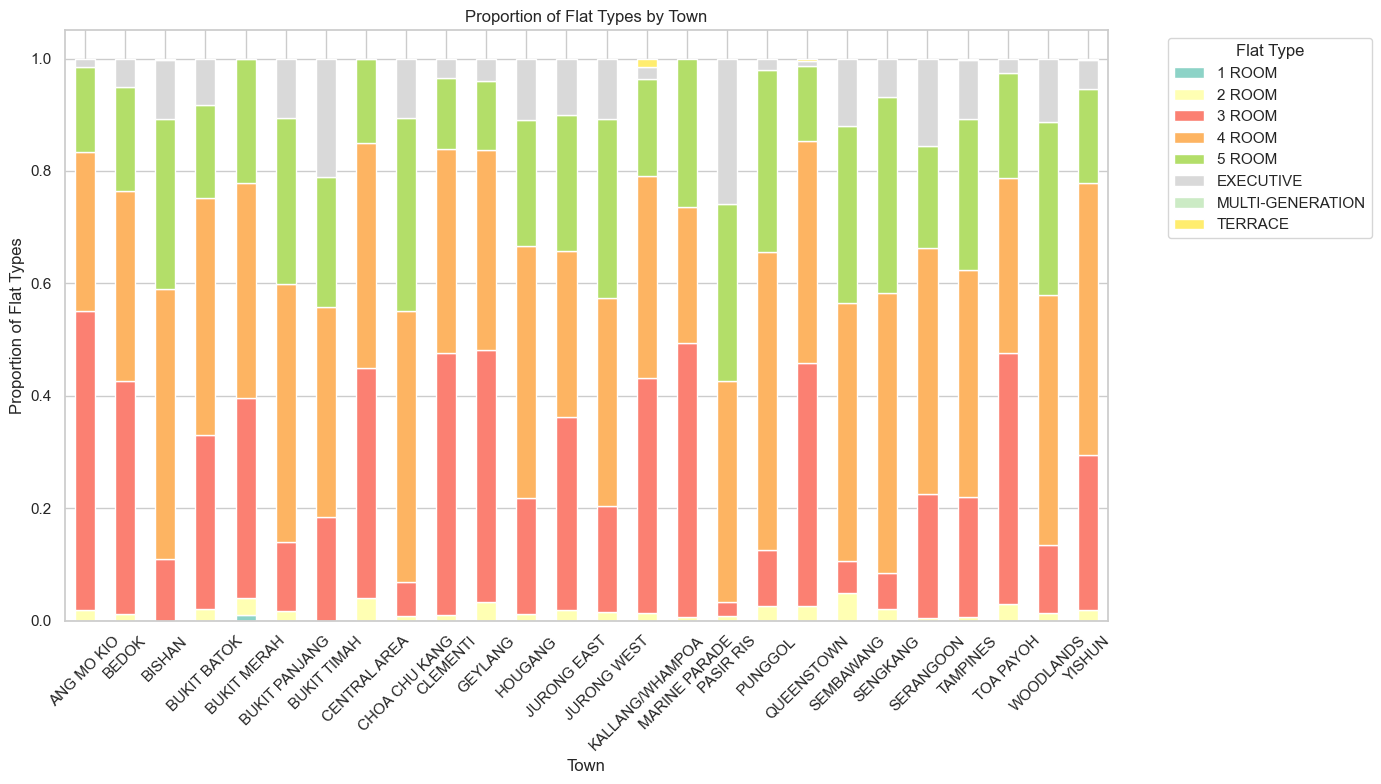

In [36]:
# Proportion of Flat Types by Town
# Calculate the count of each flat_type within each town
flat_type_counts = df.groupby(['town', 'flat_type']).size().unstack(fill_value=0)

# Calculate the proportion of each flat_type within each town
flat_type_proportions = flat_type_counts.div(flat_type_counts.sum(axis=1), axis=0)

# Plot the stacked bar chart
flat_type_proportions.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="Set3")

# Add labels and title
plt.xlabel('Town')
plt.ylabel('Proportion of Flat Types')
plt.title('Proportion of Flat Types by Town')
plt.legend(title='Flat Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

## Recommendate 5:
### Government could use this information when planning to build new flats at certian town.

## heatmap plot which show the transaction volume by month for each flat_type(by colour).

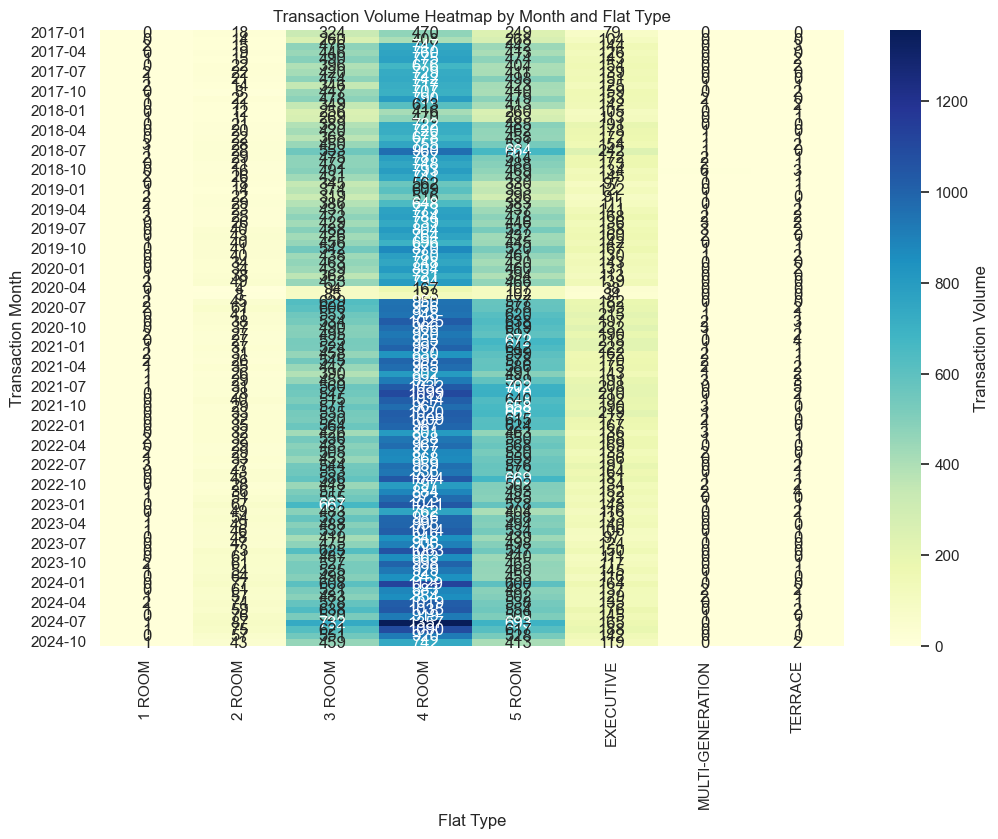

In [37]:
# Transaction Volume Heatmap by Month and Flat Type
# Group by txn_month and flat_type to get transaction counts
transaction_counts = df.groupby([df['month_date'].dt.to_period("M"), 'flat_type']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(transaction_counts, cmap='YlGnBu', annot=True, fmt="d", cbar_kws={'label': 'Transaction Volume'})

# Add labels and title
plt.xlabel('Flat Type')
plt.ylabel('Transaction Month')
plt.title('Transaction Volume Heatmap by Month and Flat Type')

# Show plot
plt.show()

# Machine Learning

## Data pre-processing
### Redefine the flat_type to a number 1-6.
### Convert month_date (date format) to  Unix timestamp


In [38]:
# Define a mapping for flat_type to numeric values
flat_type_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI-GENERATION': 6,
    'TERRACE': 6
}

# Apply the mapping to the flat_type column
df['flat_type_n'] = df['flat_type'].map(flat_type_mapping)

df['month_time'] = df['month_date'].view('int64')  # Unix timestamp
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187440 entries, 0 to 192612
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   month                 187440 non-null  object        
 1   town                  187440 non-null  object        
 2   flat_type             187440 non-null  object        
 3   block                 187440 non-null  object        
 4   street_name           187440 non-null  object        
 5   storey_range          187440 non-null  object        
 6   floor_area_sqm        187440 non-null  float64       
 7   flat_model            187440 non-null  object        
 8   lease_commence_date   187440 non-null  int64         
 9   remaining_lease       187440 non-null  object        
 10  resale_price          187440 non-null  float64       
 11  month_date            187440 non-null  datetime64[ns]
 12  remaining_lease_year  187440 non-null  float64       
 13  stor

## Select only numeric data for ML modeling namly month, flat_type, storey_range, floor_area_sqm, remaining_lease, resale_price

In [39]:
# create new df contain numeric fields DO MLR for prediction and do gradio
# Select specific columns to create a new DataFrame
columns_to_select = ['month_time','flat_type_n', 'storey_value','floor_area_sqm',
                     'remaining_lease_year','resale_price']
df1 = df[columns_to_select]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187440 entries, 0 to 192612
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   month_time            187440 non-null  int64  
 1   flat_type_n           187440 non-null  int64  
 2   storey_value          187440 non-null  int64  
 3   floor_area_sqm        187440 non-null  float64
 4   remaining_lease_year  187440 non-null  float64
 5   resale_price          187440 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 10.0 MB


## Find the correlation between each numeric field with resale_price

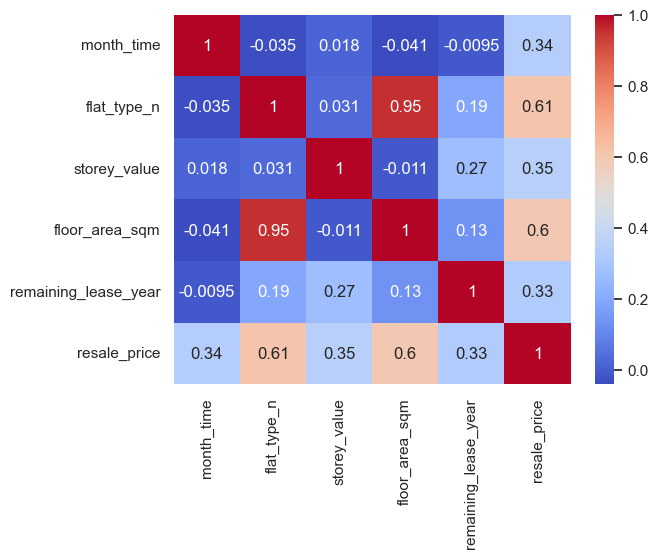

In [40]:
#  plot the correlation matrix as a heatmap

correl = df1.corr(numeric_only = True)
sns.heatmap(correl, annot = True, cmap = "coolwarm")
plt.show()

In [41]:
# Select correlations with 'resale_price' and sort them
resale_price_correlation = correl['resale_price'].sort_values(ascending=False)

# Display the correlations
print(resale_price_correlation)

resale_price            1.000000
flat_type_n             0.610116
floor_area_sqm          0.595462
storey_value            0.348905
month_time              0.339357
remaining_lease_year    0.328128
Name: resale_price, dtype: float64


## Linear Regression

In [42]:
# indentify the target variable y and the main feature variable x
 
# x = df1.drop(df.columns[-1], axis=1) # Taking all columns expcept last one as input variable
# y = df1[["resale_price"]]  # We want to predict price based on Overall features of a car.
y =df1['resale_price']
del df1['resale_price']
x = df1

In [43]:
# Split the data into train (70%) and test (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state=7)

In [44]:
#train the model

mlr_model = LinearRegression()
mlr_model.fit(x_train, y_train)

LinearRegression()

In [45]:
# Predicting the values for testing inputs

mlr_pred = mlr_model.predict(x_test)

In [46]:
# mterics from sklearn contains all the performance evaluation metrics

accuracy_mlr = metrics.r2_score(y_test, mlr_pred)
mse = mean_squared_error(y_test, mlr_pred)

print("Accuracy of the model is:", round(accuracy_mlr*100), "%")
print('Mean Squared Error of the model is: ', round(mse))

Accuracy of the model is: 50 %
Mean Squared Error of the model is:  15670071201


## To ensure the model is not underfitting or overfitting, perform a cross validation.

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
# Perform cross-validation
scores = cross_val_score(mlr_model, x_train, y_train, cv=5)
rounded_scores = ["{:.2f}".format(score*100) for score in scores] 
print("Cross-validation scores:", rounded_scores, "%") 
print("Mean cross-validation score:", "{:.2f}".format(scores.mean()*100), "%")

# Perform cross-validation with MSE scoring
mse_scores = cross_val_score(mlr_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert to positive MSE and compute the mean
mse_scores = -mse_scores
mean_mse = mse_scores.mean()

print("MSE for each fold:", mse_scores)
print("Mean MSE:", mean_mse)


Cross-validation scores: ['50.55', '50.97', '50.26', '50.70', '50.22'] %
Mean cross-validation score: 50.54 %
MSE for each fold: [1.54382949e+10 1.52826493e+10 1.56229036e+10 1.52310251e+10
 1.54930171e+10]
Mean MSE: 15413577991.21998


## The r2 score for each fold is about 50% so there is no overfitting or underfitting.

## Decision Tree

In [48]:
# x = df.drop(df.columns[-1], axis=1) # Taking all columns expcept last one as input variable
# y = df[["price"]]
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state=7)
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=7)
dt_reg.fit(x_train, y_train)


DecisionTreeRegressor(random_state=7)

In [49]:
# mterics from sklearn contains all the performance evaluation metrics

accuracy_dt = metrics.r2_score(y_test, dt_reg.predict(x_test))
dt_mse = mean_squared_error(y_test, dt_reg.predict(x_test))

print("Accuracy of the model is:", round(accuracy_dt*100), "%")
print('Mean Squared Error of the model is: ', round(dt_mse))

Accuracy of the model is: 62 %
Mean Squared Error of the model is:  11855680397


## Find out how importance of each fields with related to resale_price in this model

In [50]:
# Get feature importances
feature_importances = dt_reg.feature_importances_

# Display feature importances
for feature, importance in zip(x.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

month_time: 0.2031
flat_type_n: 0.0692
storey_value: 0.1175
floor_area_sqm: 0.4234
remaining_lease_year: 0.1868


## The importance sequence is floor_area_sqm, month, remaining_lease, storey_range and flat_type
## If this model is the better for prediction, I would consider dropping flat_type and try if it improve the r2 score. 

## To ensure the model is not underfitting or overfitting, perform a cross validation.

In [51]:
# Perform cross-validation
scores = cross_val_score(dt_reg, x_train, y_train, cv=5)
#print("Cross-validation scores:", round(scores*100), "%")

rounded_scores = ["{:.2f}".format(score*100) for score in scores] 
print("Cross-validation scores:", rounded_scores, "%") 
print("Mean cross-validation score:", "{:.2f}".format(scores.mean()*100), "%")

# Perform cross-validation with MSE scoring
mse_scores = cross_val_score(dt_reg, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert to positive MSE and compute the mean
mse_scores = -mse_scores
mean_mse = mse_scores.mean()

print("MSE for each fold:", mse_scores)
print("Mean MSE:", mean_mse)


Cross-validation scores: ['60.23', '61.15', '61.24', '60.78', '60.39'] %
Mean cross-validation score: 60.76 %
MSE for each fold: [1.24171187e+10 1.21100446e+10 1.21742047e+10 1.21167818e+10
 1.23270886e+10]
Mean MSE: 12229047691.74331


## The r2 score for each fold is about 61% so there is no overfitting or underfitting.

## Gradient Boosting Regressor

In [52]:
from sklearn import ensemble
model = ensemble.GradientBoostingRegressor(
        n_estimators = 1000,
        learning_rate = 0.1,
        max_depth = 6,
        min_samples_leaf = 9,
        max_features=0.1,
        loss='huber',
        random_state = 7
)
model.fit(x_train, y_train)

GradientBoostingRegressor(loss='huber', max_depth=6, max_features=0.1,
                          min_samples_leaf=9, n_estimators=1000,
                          random_state=7)

## Find out how importance of each fields with related to resale_price in this model

In [53]:
# These are the feature labels from our data set
feature_labels = np.array(['month_time', 'flat_type_n', 'storey_value', 'floor_area_sqm', 'remaining_lease_year'])

# Load the trained model created with train_model.py
#model = joblib.load('trained_house_regressor_model.pkl')

# Create a numpy array based on the model's feature importances
importance = model.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feature_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

remaining_lease_year - 10.50%
storey_value - 10.69%
month_time - 18.78%
flat_type_n - 21.95%
floor_area_sqm - 38.08%


## The importance sequence is floor_area_sqm, flat_type, month, storey_range and remaining_lease. 
## If this model is the better for prediction, I would consider dropping remaining_lease and try if it improve the r2 score. 
## Note this sequence is different from decision tree model. floor_area_sqm is the most important feature for the resale_price.

In [54]:
# mterics from sklearn contains all the performance evaluation metrics

accuracy_gmr = metrics.r2_score(y_test, model.predict(x_test))
mse = mean_squared_error(y_test, model.predict(x_test))

print("Accuracy of the model is:", round(accuracy_gmr*100), "%")
print('Mean Squared Error of the model is: ', round(mse))

Accuracy of the model is: 78 %
Mean Squared Error of the model is:  6948112946


## To ensure the model is not underfitting or overfitting, perform a cross validation.

In [55]:
# Perform cross-validation
scores = cross_val_score(model, x_train, y_train, cv=5)
rounded_scores = ["{:.2f}".format(score*100) for score in scores] 
print("Cross-validation scores:", rounded_scores, "%") 
print("Mean cross-validation score:", "{:.2f}".format(scores.mean()*100), "%")

# Perform cross-validation with MSE scoring
mse_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert to positive MSE and compute the mean
mse_scores = -mse_scores
mean_mse = mse_scores.mean()

print("MSE for each fold:", mse_scores)
print("Mean MSE:", mean_mse)


Cross-validation scores: ['77.57', '78.35', '77.42', '77.46', '77.52'] %
Mean cross-validation score: 77.66 %
MSE for each fold: [7.00420078e+09 6.74661809e+09 7.09143769e+09 6.96493881e+09
 6.99606199e+09]
Mean MSE: 6960651472.201915


## The r2 score for each fold is about 78% so there is no overfitting or underfitting.

# Insight 16:
# compare the three ML result
##    Model&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MSE :&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; R2_score :
### Linear Regression &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;15670071201 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  50%
### Decision tree &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;11855680397&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 62%
### Gradient Boosting Regressor&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6948112946 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;78%

## With Cross Validation&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Average&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Average
##    Model&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MSE :&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; R2_score :
### Linear Regression&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;15493017100&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 50.5%
### Decision Tree&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;12229047691&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 60.7%
### Gradient Boosting Regressor&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6960651472&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;77.7%

## Gradient Boosting Regressor is a better ML model for prediction.


## Include the town and flat_model for the same three ML model.
## Perform one_hot encoding for town and flat_model

In [57]:
features_df = pd.get_dummies(df,columns=['town','flat_model'])

In [58]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187440 entries, 0 to 192612
Data columns (total 63 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   month                              187440 non-null  object        
 1   flat_type                          187440 non-null  object        
 2   block                              187440 non-null  object        
 3   street_name                        187440 non-null  object        
 4   storey_range                       187440 non-null  object        
 5   floor_area_sqm                     187440 non-null  float64       
 6   lease_commence_date                187440 non-null  int64         
 7   remaining_lease                    187440 non-null  object        
 8   resale_price                       187440 non-null  float64       
 9   month_date                         187440 non-null  datetime64[ns]
 10  remaining_lease_year     

## Remove the unwant fields for the ML modeling.

In [59]:
# create new df contain numeric fields DO MLR for prediction

del features_df['month']
del features_df['flat_type']
del features_df['block']
del features_df['street_name']
del features_df['storey_range']
del features_df['remaining_lease']
del features_df['room_category']
del features_df['month_date']
del features_df['year']
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187440 entries, 0 to 192612
Data columns (total 54 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   floor_area_sqm                     187440 non-null  float64
 1   lease_commence_date                187440 non-null  int64  
 2   resale_price                       187440 non-null  float64
 3   remaining_lease_year               187440 non-null  float64
 4   storey_value                       187440 non-null  int64  
 5   flat_type_n                        187440 non-null  int64  
 6   month_time                         187440 non-null  int64  
 7   town_ANG MO KIO                    187440 non-null  bool   
 8   town_BEDOK                         187440 non-null  bool   
 9   town_BISHAN                        187440 non-null  bool   
 10  town_BUKIT BATOK                   187440 non-null  bool   
 11  town_BUKIT MERAH                   187440 no

In [60]:
 features_df.head()

,floor_area_sqm,lease_commence_date,resale_price,remaining_lease_year,storey_value,flat_type_n,month_time,town_ANG MO KIO,town_BEDOK,town_BISHAN,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,44.0,1979,232000.0,61.33,4,2,1483228800000000000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,67.0,1978,250000.0,60.58,1,3,1483228800000000000,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2,67.0,1980,262000.0,62.42,1,3,1483228800000000000,True,False,False,...,False,True,False,False,False,False,False,False,False,False
3,68.0,1980,265000.0,62.08,2,3,1483228800000000000,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,67.0,1980,265000.0,62.42,1,3,1483228800000000000,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [61]:
y=features_df['resale_price'].to_numpy()
del features_df['resale_price']
x=features_df.to_numpy()


In [63]:
# Split the data into train (70%) and test (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state=7)

## Linear regression

In [64]:
#train the model

mlr_model = LinearRegression()
mlr_model.fit(x_train, y_train)

LinearRegression()

In [65]:
# Predicting the values for testing inputs

mlr_pred = mlr_model.predict(x_test)

In [66]:
# mterics from sklearn contains all the performance evaluation metrics

accuracy_mlr = metrics.r2_score(y_test, mlr_pred)
mse = mean_squared_error(y_test, mlr_pred)

print("Accuracy of the model is:", round(accuracy_mlr*100), "%")
print('Mean Squared Error of the model is: ', round(mse))

Accuracy of the model is: 54 %
Mean Squared Error of the model is:  14499586415


## It has 4% improvement. To fine tune the model try a Ridge regression.

In [67]:
from sklearn.linear_model import Ridge
# Fit Ridge Regression
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)

# Predictions and R2 score
y_pred = model.predict(x_test)
accuracy_ridge = metrics.r2_score(y_test, y_pred)
print("Accuracy of the model is:", round(accuracy_ridge*100), "%")

Accuracy of the model is: 86 %


## It show quit a good improvement to 86%

## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=7)
dt_reg.fit(x_train, y_train)


DecisionTreeRegressor(random_state=7)

In [69]:
# mterics from sklearn contains all the performance evaluation metrics

accuracy_dt = metrics.r2_score(y_test, dt_reg.predict(x_test))
dt_mse = mean_squared_error(y_test, dt_reg.predict(x_test))

print("Accuracy of the model is:", round(accuracy_dt*100), "%")
print('Mean Squared Error of the model is: ', round(dt_mse))

Accuracy of the model is: 93 %
Mean Squared Error of the model is:  2289794414


## To fine tune decision tree model. we can change the value of these hyperparameters namly max_depth, min_samples_split, min_samples_leaf, max_features.
## Use GridSearchCV to find the best values.

In [70]:
# Find best parameter for decision tree mainly max_depth, min_samples_split, min_samples_leaf, max_features
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


## Base on a few suggested values for each hyperparameter. GridSearchCV find the best parameters that suit this model.
## Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

In [71]:
# Use the best parameters for decision tree
best_params = { 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10 } 
regressor = DecisionTreeRegressor(**best_params) 
# Training the model 
regressor.fit(x_train, y_train) 
# Making predictions on the test set 
y_pred = regressor.predict(x_test) 
# Evaluating the model 
mse = mean_squared_error(y_test, y_pred) 
print(f"Mean Squared Error: {mse:.2f}")
accuracy_dt = metrics.r2_score(y_test, y_pred)
print("Accuracy of the model is:", round(accuracy_dt*100), "%")


Mean Squared Error: 1913260449.67
Accuracy of the model is: 94 %


## With the suggested parameters, the model improve from 93% to 94%

## Gradient Boosting Regressor

In [72]:
from sklearn import ensemble
model = ensemble.GradientBoostingRegressor(
        n_estimators = 1000,
        learning_rate = 0.1,
        max_depth = 6,
        min_samples_leaf = 9,
        max_features=0.1,
        loss='huber',
        random_state = 7
)
model.fit(x_train, y_train)

GradientBoostingRegressor(loss='huber', max_depth=6, max_features=0.1,
                          min_samples_leaf=9, n_estimators=1000,
                          random_state=7)

In [73]:
# mterics from sklearn contains all the performance evaluation metrics

accuracy_gmr = metrics.r2_score(y_test, model.predict(x_test))
mse = mean_squared_error(y_test, model.predict(x_test))

print("Accuracy of the model is:", round(accuracy_gmr*100), "%")
print('Mean Squared Error of the model is: ', round(mse))

Accuracy of the model is: 96 %
Mean Squared Error of the model is:  1176189041


## To fine tune GradientBoostingRegressor model. we can change the value of these hyperparameters namly learning_rate, n_estimators, max_depth, min_samples_leaf,  max_features and loss.
## As GridSearchCV take very to process, I use RandomizedSearchCV instead

In [74]:
# Find best parameter for GradientBoostingRegressor mainly learning_rate, n_estimators, max_depth, min_samples_leaf,  max_features and loss
from sklearn.model_selection import RandomizedSearchCV 

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 8],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [0.1, 0.5, 1.0],
    'loss': ['huber', 'ls', 'lad']
}

gbr = ensemble.GradientBoostingRegressor(random_state=42)
grid_search = RandomizedSearchCV (gbr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_estimators': 300, 'min_samples_leaf': 3, 'max_features': 0.1, 'max_depth': 8, 'loss': 'huber', 'learning_rate': 0.1}


## Base on a few suggested values for each hyperparameter. RandomizedSearchCV find the best parameters that suit this model.
## Best Parameters: {'n_estimators': 300, 'min_samples_leaf': 3, 'max_features': 0.1, 'max_depth': 8, 'loss': 'huber', 'learning_rate': 0.1}

In [75]:
# Use the best parameters for GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor(
        n_estimators = 300,
        learning_rate = 0.1,
        max_depth = 8,
        min_samples_leaf = 3,
        max_features=0.1,
         loss='huber',
        random_state = 7
)
model.fit(x_train, y_train)

GradientBoostingRegressor(loss='huber', max_depth=8, max_features=0.1,
                          min_samples_leaf=3, n_estimators=300, random_state=7)

In [76]:
# mterics from sklearn contains all the performance evaluation metrics

accuracy_gmr = metrics.r2_score(y_test, model.predict(x_test))
mse = mean_squared_error(y_test, model.predict(x_test))

print("Accuracy of the model is:", round(accuracy_gmr*100), "%")
print('Mean Squared Error of the model is: ', round(mse))

Accuracy of the model is: 96 %
Mean Squared Error of the model is:  1218309872


## From the result the model does not seem to have improvement. Base on Mean Squared Error, it is actually worst off.

## Insight 17:

### Linear regression result is 54  %
### Decision tree. accuracy is 93%
### Gradient Boosting Regressor. accuracy is 96%

### With tuning
### Ridge Regression. accuracy is 86%
### Decision tree(with GridSearchCV) . accuracy is 94%
### Gradient Boosting Regressor(with RandomizedSearchCV). accuracy is 96%

## The best model is Gradient Boosting Regressor 96% accuracy. 
## In fact, if the accuracy is 90%, that model is good to use for prediction.

## Prediction

## Find the Unix timestamp for '20241201' i.e. plan to sell in Dec 2024.

In [77]:
import datetime

# Given date as a string
date_str = '20241201'

# Convert the string to a datetime object
date_obj = datetime.datetime.strptime(date_str, '%Y%m%d')

# Convert the datetime object to a Unix timestamp
unix_timestamp = int(date_obj.timestamp())

print(f"Unix timestamp in nanoseconds for {date_str} is {unix_timestamp*100000000}")


Unix timestamp in nanoseconds for 20241201 is 173298240000000000


## Use the Gradient Boosting Regressor model to predict

In [78]:

# Assume input data as follow
# floor_area_sqm  = 67 
# lease_commence_date = 1978  
# remaining_lease_year = 60.58  60 year and 7 month
# storey_value  = 1 floor level 01 - 03
#  flat_type = 3 '3 room'
# month_time = '20241201' 1732982400000000000
# town='ANG MO KIO'   
# flat_model= 'New Generation'   

x_input = np.array([67.0, 1978, 60.58, 1, 3, 1732982400000000000, True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       True, False, False, False, False, False, False, False, False])

# Reshape your input array to be 2D 
x_input = x_input.reshape(1, -1)

y_output = model.predict(x_input)

print('The prediction of the resale price is', y_output)

The prediction of the resale price is [397110.53865908]


## With the given information the predicted resale price is $397,110

## Save the model for prediction using tkinter codes

In [79]:
import joblib

# Save the trained model
joblib.dump(model, 'model.pkl')


['model.pkl']